In [115]:
import numpy as np
import pandas as pd

In [42]:
data_unfil = pd.read_csv("csvs/train.csv")

In [43]:
data_unfil

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


In [44]:
data_unfil.drop("id" , axis= 1,inplace=True)

In [45]:
data_unfil

,date,country,store,product,num_sold
0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...
230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


In [46]:
data = data_unfil

In [15]:
date = data["date"]
data.drop("date",axis=1,inplace=True)

In [16]:
for i in list(set(data["store"].values)):
    print(i,"\n",data[data["store"]==i].describe(),"\n")

Stickers for Less 
            num_sold
count  74044.000000
mean     840.046418
std      688.522598
min        5.000000
25%      234.000000
50%      744.000000
75%     1247.000000
max     4444.000000 

Premium Sticker Mart 
            num_sold
count  75684.000000
mean     973.836240
std      814.581952
min        5.000000
25%      255.000000
50%      859.000000
75%     1459.000000
max     5939.000000 

Discount Stickers 
            num_sold
count  71531.000000
mean     427.775887
std      339.684324
min        5.000000
25%      142.000000
50%      380.000000
75%      624.000000
max     2488.000000 



In [17]:
data["store"].value_counts()

store
Discount Stickers       76710
Stickers for Less       76710
Premium Sticker Mart    76710
Name: count, dtype: int64

In [18]:
#arranging in order of high mean
country_influ = ["Norway","Canada","Singapore","Italy","Finland","Kenya"]
store_influ = ["Premium Sticker Mart","Discount Stickers","Stickers for Less"]


In [19]:
import category_encoders as ce
oe = ce.OrdinalEncoder(mapping=[{'col': "country", 'mapping': {level: index for index, level in enumerate(country_influ)}}])
data=oe.fit_transform(data)
oe = ce.OrdinalEncoder(mapping=[{'col': "store", 'mapping': {level: index for index, level in enumerate(store_influ)}}])
data=oe.fit_transform(data)
le = ce.OrdinalEncoder()
data["product"]=le.fit_transform(data["product"])

In [20]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=3)
data_imputed = knn.fit_transform(data)

In [21]:
a = data_imputed

In [22]:
data_imputed = pd.DataFrame(data_imputed)

In [23]:
data_imputed.columns = data.columns

In [24]:
data_imputed

,country,store,product,num_sold
0,1.0,1.0,1.0,549.333333
1,1.0,1.0,2.0,973.000000
2,1.0,1.0,3.0,906.000000
3,1.0,1.0,4.0,423.000000
4,1.0,1.0,5.0,491.000000
...,...,...,...,...
230125,2.0,0.0,1.0,466.000000
230126,2.0,0.0,2.0,2907.000000
230127,2.0,0.0,3.0,2299.000000
230128,2.0,0.0,4.0,1242.000000


In [25]:
for i in data.drop("num_sold",axis=1):
    data_imputed[i]=data_imputed[i].astype(str)

In [26]:
#for country,shop its better to use target encoding as it have good relation with numsold
import category_encoders as ce
te = ce.TargetEncoder()
for i in ["country","store"]:
    data_imputed[i]=te.fit_transform(X=data_imputed[i],y=data_imputed["num_sold"])

In [27]:
data_imputed

,country,store,product,num_sold
0,797.128102,419.162830,1.0,549.333333
1,797.128102,419.162830,2.0,973.000000
2,797.128102,419.162830,3.0,906.000000
3,797.128102,419.162830,4.0,423.000000
4,797.128102,419.162830,5.0,491.000000
...,...,...,...,...
230125,863.052379,962.599426,1.0,466.000000
230126,863.052379,962.599426,2.0,2907.000000
230127,863.052379,962.599426,3.0,2299.000000
230128,863.052379,962.599426,4.0,1242.000000


In [28]:
data_imputed

,country,store,product,num_sold
0,797.128102,419.162830,1.0,549.333333
1,797.128102,419.162830,2.0,973.000000
2,797.128102,419.162830,3.0,906.000000
3,797.128102,419.162830,4.0,423.000000
4,797.128102,419.162830,5.0,491.000000
...,...,...,...,...
230125,863.052379,962.599426,1.0,466.000000
230126,863.052379,962.599426,2.0,2907.000000
230127,863.052379,962.599426,3.0,2299.000000
230128,863.052379,962.599426,4.0,1242.000000


<Figure size 640x480 with 0 Axes>

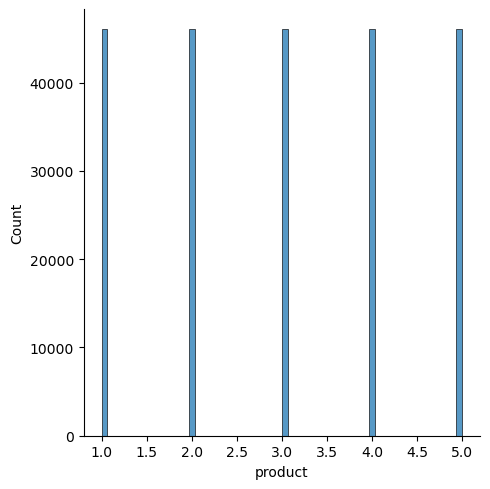

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.displot(data["product"])
plt.show()

In [47]:
data_unfil

,date,country,store,product,num_sold
0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...
230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


In [48]:
data_imputed

,country,store,product,num_sold,date
0,797.128102,419.162830,1.0,549.333333,2010-01-01
1,797.128102,419.162830,2.0,973.000000,2010-01-01
2,797.128102,419.162830,3.0,906.000000,2010-01-01
3,797.128102,419.162830,4.0,423.000000,2010-01-01
4,797.128102,419.162830,5.0,491.000000,2010-01-01
...,...,...,...,...,...
230125,863.052379,962.599426,1.0,466.000000,2016-12-31
230126,863.052379,962.599426,2.0,2907.000000,2016-12-31
230127,863.052379,962.599426,3.0,2299.000000,2016-12-31
230128,863.052379,962.599426,4.0,1242.000000,2016-12-31


In [49]:
data_unfil["num_sold"]=data_imputed["num_sold"]

In [50]:
data_unfil["num_sold"]=data_unfil["num_sold"].astype(int)

In [51]:
data = pd.pivot_table(data_unfil,index = "date",columns=["store","product"],values="num_sold")

In [52]:
data

store      Discount Stickers                                       \
product    Holographic Goose      Kaggle Kaggle Tiers    Kerneler   
date                                                                
2010-01-01        213.000000  871.833333   769.333333  398.500000   
2010-01-02        210.166667  833.333333   750.333333  398.833333   
2010-01-03        217.166667  916.333333   779.500000  420.500000   
2010-01-04        193.666667  659.166667   630.166667  305.000000   
2010-01-05        186.166667  695.666667   586.000000  291.333333   
...                      ...         ...          ...         ...   
2016-12-27        187.833333  685.166667   519.500000  301.666667   
2016-12-28        193.666667  762.500000   580.833333  343.666667   
2016-12-29        212.166667  819.833333   643.166667  379.333333   
2016-12-30        208.500000  884.166667   668.000000  376.000000   
2016-12-31        209.500000  858.666667   675.833333  381.000000   

store                         Premium Sticker Mart                            \
product    Kerneler Dark Mode    Holographic Goose       Kaggle Kaggle Tiers   
date                                                                           
2010-01-01         460.333333           325.833333  2065.833333  1829.333333   
2010-01-02         435.333333           316.166667  1979.500000  1808.000000   
2010-01-03         468.500000           335.000000  2221.666667  1963.000000   
2010-01-04         382.166667           259.166667  1634.500000  1495.000000   
2010-01-05         351.833333           258.166667  1533.833333  1419.833333   
...                       ...                  ...          ...          ...   
2016-12-27         366.000000           251.166667  1637.333333  1287.666667   
2016-12-28         393.500000           284.000000  1836.833333  1365.500000   
2016-12-29         427.000000           293.000000  2036.666667  1580.666667   
2016-12-30         472.000000           308.500000  2077.166667  1548.000000   
2016-12-31         450.333333           322.666667  2089.833333  1616.500000   

store                                     Stickers for Less               \
product       Kerneler Kerneler Dark Mode Holographic Goose       Kaggle   
date                                                                       
2010-01-01  980.500000        1129.000000        287.333333  1766.500000   
2010-01-02  890.833333        1086.500000        257.000000  1761.333333   
2010-01-03  988.000000        1165.333333        283.833333  1796.500000   
2010-01-04  744.333333         905.833333        227.833333  1401.000000   
2010-01-05  720.333333         855.833333        213.000000  1368.166667   
...                ...                ...               ...          ...   
2016-12-27  751.000000         848.833333        218.500000  1369.833333   
2016-12-28  795.666667         943.500000        246.833333  1576.666667   
2016-12-29  877.166667        1028.500000        250.833333  1642.666667   
2016-12-30  935.500000        1110.500000        273.333333  1795.000000   
2016-12-31  942.000000        1117.000000        276.000000  1668.333333   

store                                                   
product    Kaggle Tiers    Kerneler Kerneler Dark Mode  
date                                                    
2010-01-01  1560.666667  797.666667         906.500000  
2010-01-02  1446.500000  743.500000         941.833333  
2010-01-03  1523.166667  794.000000         950.000000  
2010-01-04  1238.000000  620.666667         751.333333  
2010-01-05  1214.833333  602.666667         756.500000  
...                 ...         ...                ...  
2016-12-27  1071.833333  624.833333         737.166667  
2016-12-28  1152.500000  700.166667         781.500000  
2016-12-29  1257.000000  712.666667         841.333333  
2016-12-30  1379.000000  776.166667         937.666667  
2016-12-31  1385.333333  745.000000         934.666667  

[2557 rows x 15 columns]

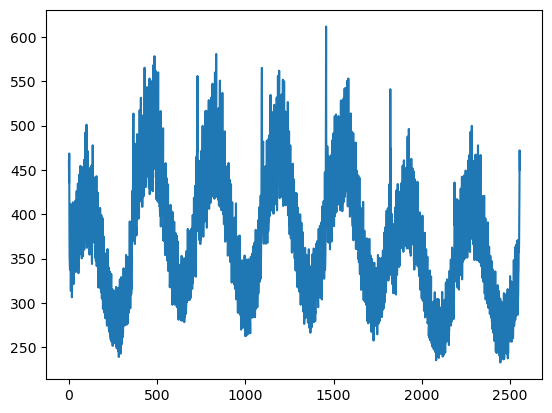

In [97]:
copy = data["Discount Stickers"]["Kerneler Dark Mode"]
copy = pd.DataFrame(copy)
copy.index=range(2557)
plt.plot(copy)

### seen that data is split into 2 sems

In [99]:
data_imputed

,country,store,product,num_sold,date
0,797.128102,419.162830,1.0,549.333333,2010-01-01
1,797.128102,419.162830,2.0,973.000000,2010-01-01
2,797.128102,419.162830,3.0,906.000000,2010-01-01
3,797.128102,419.162830,4.0,423.000000,2010-01-01
4,797.128102,419.162830,5.0,491.000000,2010-01-01
...,...,...,...,...,...
230125,863.052379,962.599426,1.0,466.000000,2016-12-31
230126,863.052379,962.599426,2.0,2907.000000,2016-12-31
230127,863.052379,962.599426,3.0,2299.000000,2016-12-31
230128,863.052379,962.599426,4.0,1242.000000,2016-12-31


In [105]:
data_copy = data_imputed.copy()

In [106]:
data_copy

,country,store,product,num_sold,date
0,797.128102,419.162830,1.0,549.333333,2010-01-01
1,797.128102,419.162830,2.0,973.000000,2010-01-01
2,797.128102,419.162830,3.0,906.000000,2010-01-01
3,797.128102,419.162830,4.0,423.000000,2010-01-01
4,797.128102,419.162830,5.0,491.000000,2010-01-01
...,...,...,...,...,...
230125,863.052379,962.599426,1.0,466.000000,2016-12-31
230126,863.052379,962.599426,2.0,2907.000000,2016-12-31
230127,863.052379,962.599426,3.0,2299.000000,2016-12-31
230128,863.052379,962.599426,4.0,1242.000000,2016-12-31


In [107]:
data_copy["date"]= pd.to_datetime(data_copy["date"])

In [108]:
data_copy.dtypes

country            float64
store              float64
product             object
num_sold           float64
date        datetime64[ns]
dtype: object

In [111]:
data_copy["quarter"]=data_copy["date"].dt.quarter

In [117]:
data_copy["sem"]=np.where(data_copy["quarter"].isin([1,2]),1,2)

In [118]:
data_copy

,country,store,product,num_sold,date,quarter,sem
0,797.128102,419.162830,1.0,549.333333,2010-01-01,1,1
1,797.128102,419.162830,2.0,973.000000,2010-01-01,1,1
2,797.128102,419.162830,3.0,906.000000,2010-01-01,1,1
3,797.128102,419.162830,4.0,423.000000,2010-01-01,1,1
4,797.128102,419.162830,5.0,491.000000,2010-01-01,1,1
...,...,...,...,...,...,...,...
230125,863.052379,962.599426,1.0,466.000000,2016-12-31,4,2
230126,863.052379,962.599426,2.0,2907.000000,2016-12-31,4,2
230127,863.052379,962.599426,3.0,2299.000000,2016-12-31,4,2
230128,863.052379,962.599426,4.0,1242.000000,2016-12-31,4,2


In [ ]:
data_copy.drop(["quarter","date"],axis=1,inplace=True)

In [122]:
data_copy

,country,store,product,num_sold,sem
0,797.128102,419.162830,1.0,549.333333,1
1,797.128102,419.162830,2.0,973.000000,1
2,797.128102,419.162830,3.0,906.000000,1
3,797.128102,419.162830,4.0,423.000000,1
4,797.128102,419.162830,5.0,491.000000,1
...,...,...,...,...,...
230125,863.052379,962.599426,1.0,466.000000,2
230126,863.052379,962.599426,2.0,2907.000000,2
230127,863.052379,962.599426,3.0,2299.000000,2
230128,863.052379,962.599426,4.0,1242.000000,2
